In [1]:
import os

# Path to the dataset folder (usually under '/kaggle/input/')
dataset_path = '/kaggle/input/cardetection'

# Function to print directory structure
def print_directory_structure(path, indent=0):
    for item in os.listdir(path):
        item_path = os.path.join(path, item)
        if os.path.isdir(item_path):
            print('  ' * indent + f"[DIR] {item}")
            print_directory_structure(item_path, indent + 1)  # Recursive call
        else:
            print('  ' * indent + f"[FILE] {item}")

# Print the dataset structure
print_directory_structure(dataset_path)


[DIR] car
  [FILE] README.dataset.txt
  [FILE] README.roboflow.txt
  [FILE] data.yaml
  [DIR] valid
    [DIR] labels
      [FILE] 000825_jpg.rf.5217db7b554510a418092e5f2aa43864.txt
      [FILE] 001638_JPG_jpg.rf.2a3d2a331eb8c9bf6afc868c6da103c8.txt
      [FILE] road672_png.rf.399722f8bd34dc5991633bbbe681cc47.txt
      [FILE] 00004_00037_00010_png.rf.2d548b82f656367528a9b69d5b6b82cf.txt
      [FILE] 00014_00009_00012_png.rf.02ffbac072397fe4f36979ba80f74fb9.txt
      [FILE] 00014_00010_00001_png.rf.68c586d3ac58ed9ad2b5b51c2702b4cf.txt
      [FILE] 00000_00003_00002_png.rf.76d9ce9f361d1b20eb1b0d5c4d9356b7.txt
      [FILE] road359_png.rf.c4125f36b26194a2c30d623150bf73bf.txt
      [FILE] road785_png.rf.2e31920d3a7a5362662eadaa7fff5085.txt
      [FILE] 000047_jpg.rf.3da4d486d7b29ef66899b32813c47247.txt
      [FILE] fe70f927-cb53-477a-9466-861bbb6a5c02_jpg.rf.6e08b1c0e0b9f457efb1ef781773ff20.txt
      [FILE] road191_png.rf.d20e2f659f768a1619960d9410d43450.txt
      [FILE] FisheyeCamera_1_0000

Train Dataset Overview:
Number of images: 3530
Number of labels: 3530
Missing labels for 0 images.

Class Distribution for Train Dataset:


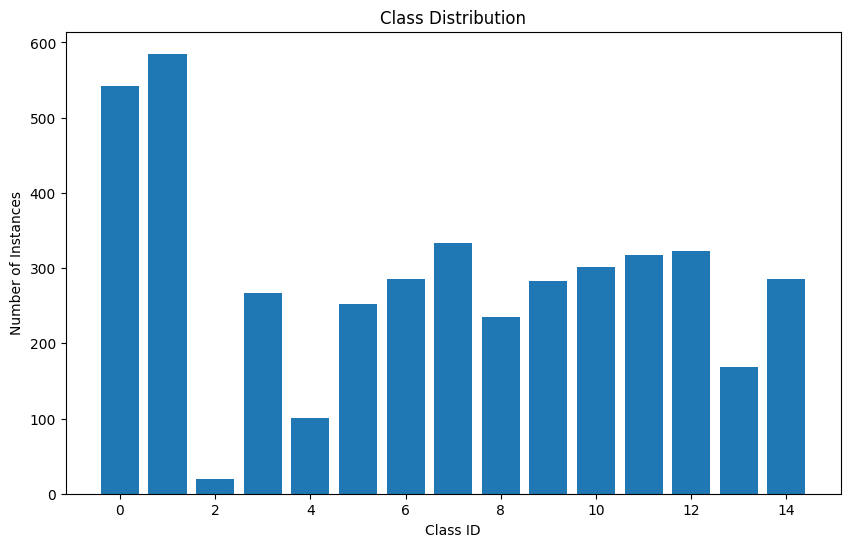


Visualizing Random Samples from Train Dataset:


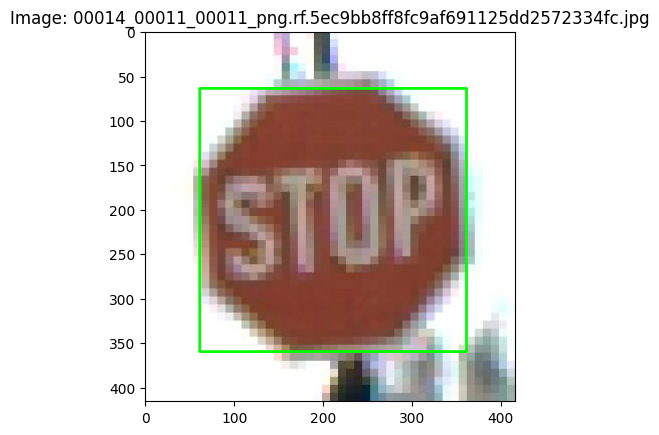

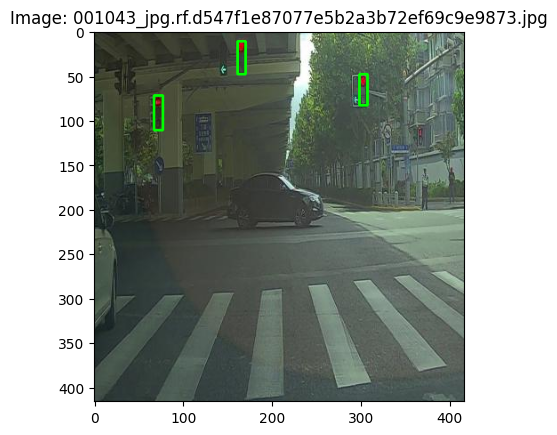

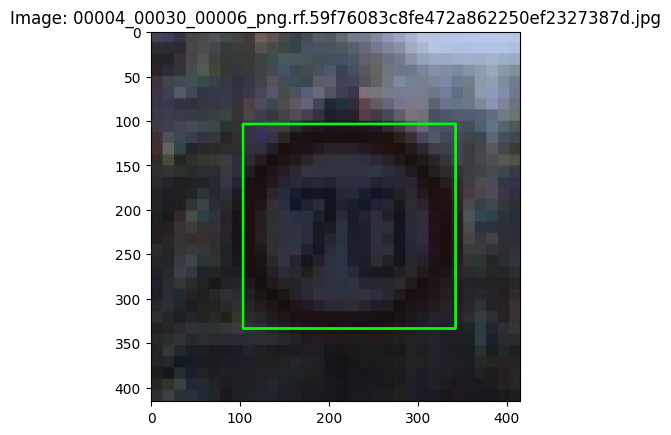

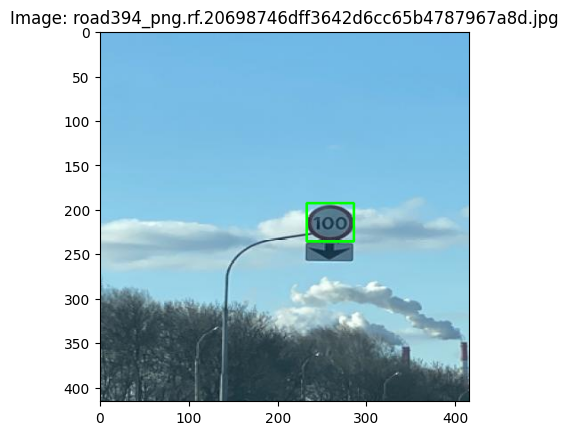

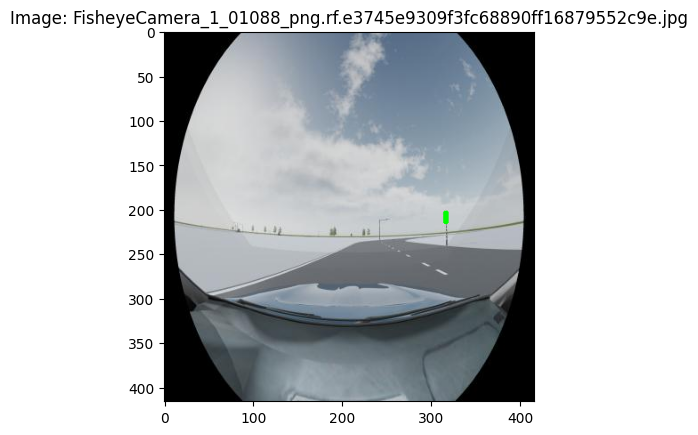


Checking Image Resolutions and Aspect Ratios for Train Dataset:
Image Resolutions (Width x Height):
        Width  Height
count  3530.0  3530.0
mean    416.0   416.0
std       0.0     0.0
min     416.0   416.0
25%     416.0   416.0
50%     416.0   416.0
75%     416.0   416.0
max     416.0   416.0

Aspect Ratios:
       Aspect Ratio
count        3530.0
mean            1.0
std             0.0
min             1.0
25%             1.0
50%             1.0
75%             1.0
max             1.0


In [2]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from random import sample

# Paths for images and labels
train_images_path = '/kaggle/input/cardetection/car/train/images/'
train_labels_path = '/kaggle/input/cardetection/car/train/labels/'
valid_images_path = '/kaggle/input/cardetection/car/valid/images/'
valid_labels_path = '/kaggle/input/cardetection/car/valid/labels/'
test_images_path = '/kaggle/input/cardetection/car/test/images/'
test_labels_path = '/kaggle/input/cardetection/car/test/labels/'

# Function to read a label file and parse it
def read_label_file(label_path):
    with open(label_path, 'r') as file:
        lines = file.readlines()
    labels = []
    for line in lines:
        # Each line is expected to be in the format: class_id x_center y_center width height
        label_info = line.strip().split()
        labels.append({
            'class_id': int(label_info[0]),
            'x_center': float(label_info[1]),
            'y_center': float(label_info[2]),
            'width': float(label_info[3]),
            'height': float(label_info[4])
        })
    return labels

# Dataset Overview (number of images and labels)
def dataset_overview(images_path, labels_path):
    image_files = os.listdir(images_path)
    label_files = os.listdir(labels_path)
    
    print(f"Number of images: {len(image_files)}")
    print(f"Number of labels: {len(label_files)}")
    
    # Ensuring every image has a corresponding label
    image_names = {image.split('.')[0] for image in image_files}
    label_names = {label.split('.')[0] for label in label_files}
    
    missing_labels = image_names - label_names
    print(f"Missing labels for {len(missing_labels)} images.")
    
# Class distribution
def class_distribution(labels_path):
    class_count = {}
    
    # Loop through each label file
    for label_file in os.listdir(labels_path):
        label_path = os.path.join(labels_path, label_file)
        labels = read_label_file(label_path)
        for label in labels:
            class_id = label['class_id']
            if class_id not in class_count:
                class_count[class_id] = 0
            class_count[class_id] += 1
    
    class_count = {k: v for k, v in sorted(class_count.items(), key=lambda item: item[1], reverse=True)}
    
    # Plotting class distribution
    plt.figure(figsize=(10, 6))
    plt.bar(class_count.keys(), class_count.values())
    plt.xlabel('Class ID')
    plt.ylabel('Number of Instances')
    plt.title('Class Distribution')
    plt.show()

# Visualize random samples with bounding boxes
def visualize_random_samples(images_path, labels_path, num_samples=5):
    sample_images = sample(os.listdir(images_path), num_samples)
    
    for image_name in sample_images:
        image_path = os.path.join(images_path, image_name)
        label_path = os.path.join(labels_path, image_name.replace('.jpg', '.txt'))
        
        # Read image
        image = cv2.imread(image_path)
        h, w, _ = image.shape
        
        # Read corresponding label
        labels = read_label_file(label_path)
        
        # Plot bounding boxes
        for label in labels:
            x_center = label['x_center'] * w
            y_center = label['y_center'] * h
            width = label['width'] * w
            height = label['height'] * h
            
            # Calculate the top-left and bottom-right corners of the bounding box
            x1 = int(x_center - width / 2)
            y1 = int(y_center - height / 2)
            x2 = int(x_center + width / 2)
            y2 = int(y_center + height / 2)
            
            # Draw rectangle (bounding box)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
        # Show the image with bounding boxes
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f"Image: {image_name}")
        plt.show()

# Check image resolution and aspect ratio
def check_image_resolution(images_path):
    resolutions = []
    aspect_ratios = []
    
    for image_file in os.listdir(images_path):
        image_path = os.path.join(images_path, image_file)
        image = cv2.imread(image_path)
        h, w, _ = image.shape
        resolutions.append((w, h))
        aspect_ratios.append(w / h)
    
    resolutions_df = pd.DataFrame(resolutions, columns=['Width', 'Height'])
    aspect_ratios_df = pd.DataFrame(aspect_ratios, columns=['Aspect Ratio'])
    
    print("Image Resolutions (Width x Height):")
    print(resolutions_df.describe())
    print("\nAspect Ratios:")
    print(aspect_ratios_df.describe())
    
# Run EDA Tasks
print("Train Dataset Overview:")
dataset_overview(train_images_path, train_labels_path)
print("\nClass Distribution for Train Dataset:")
class_distribution(train_labels_path)
print("\nVisualizing Random Samples from Train Dataset:")
visualize_random_samples(train_images_path, train_labels_path)
print("\nChecking Image Resolutions and Aspect Ratios for Train Dataset:")
check_image_resolution(train_images_path)



Bounding Box Area Distribution:


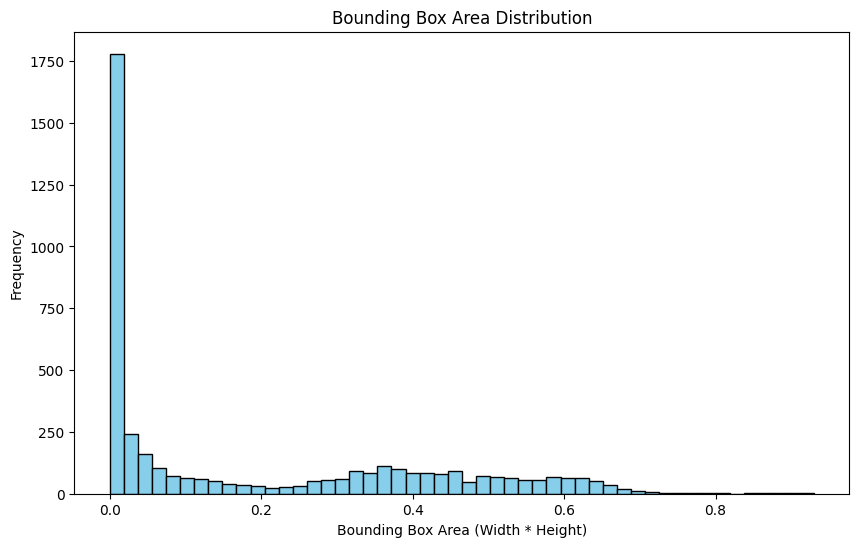


Bounding Box Count Distribution per Image:


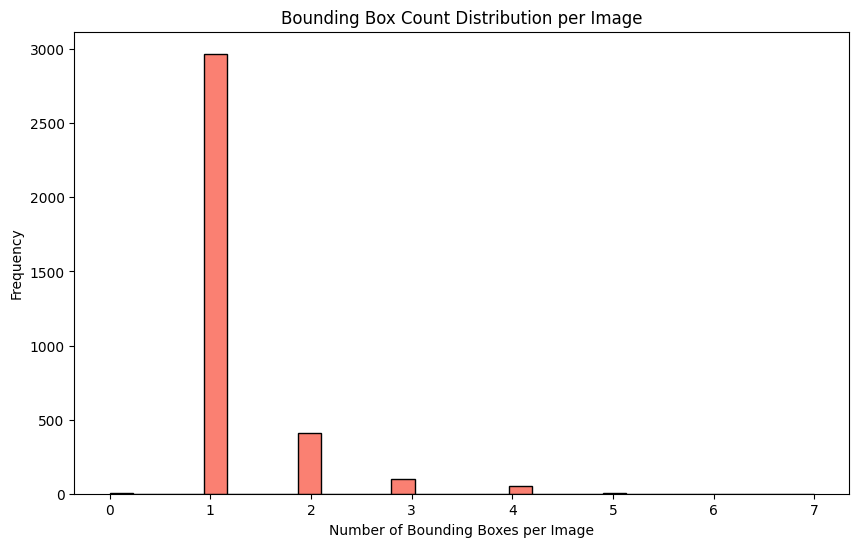


Class-wise Bounding Box Area Distribution:


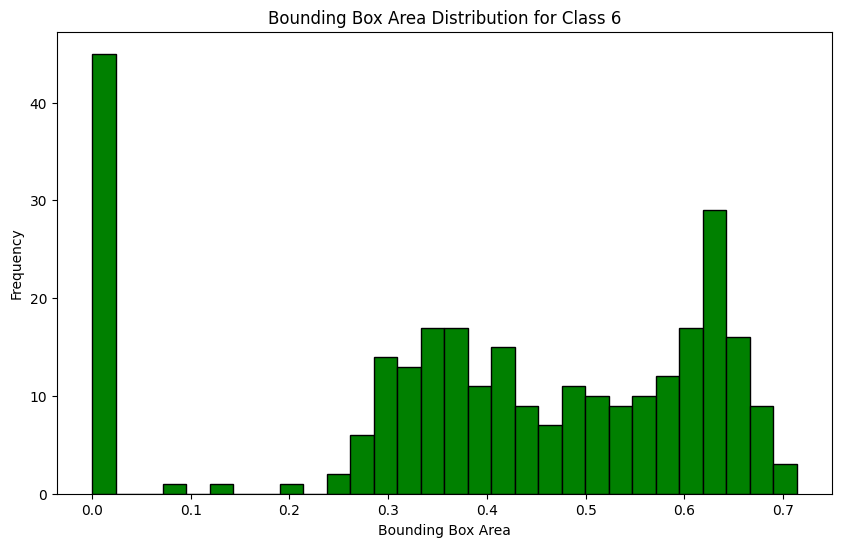

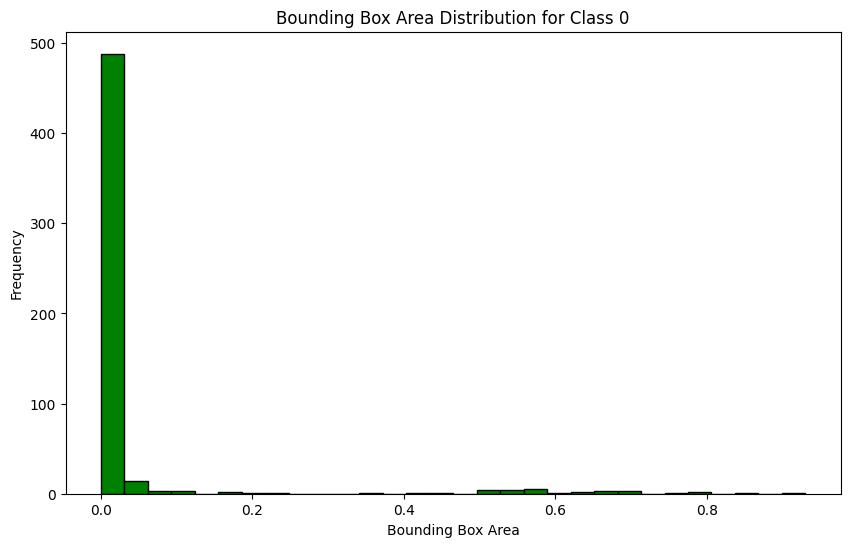

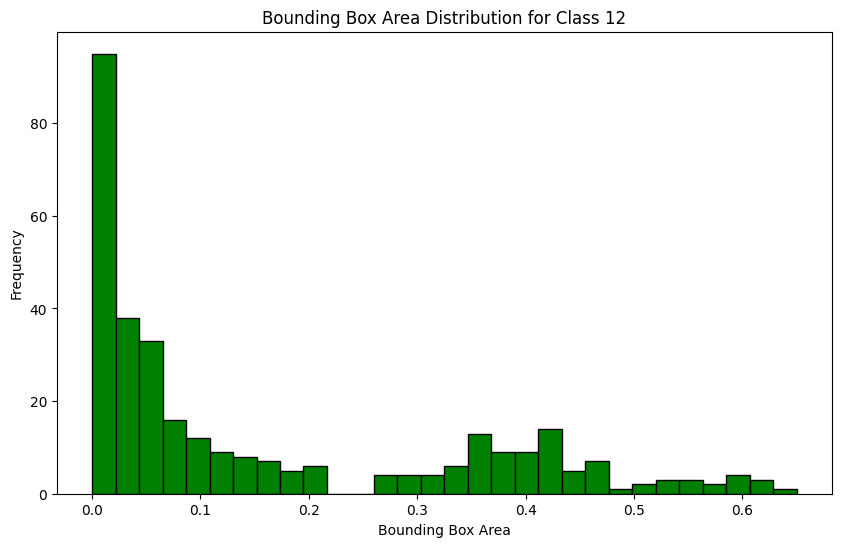

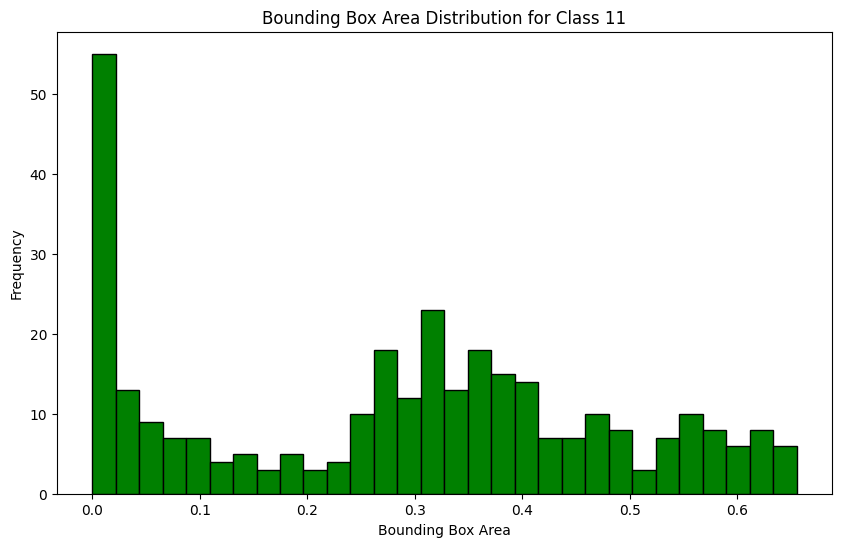

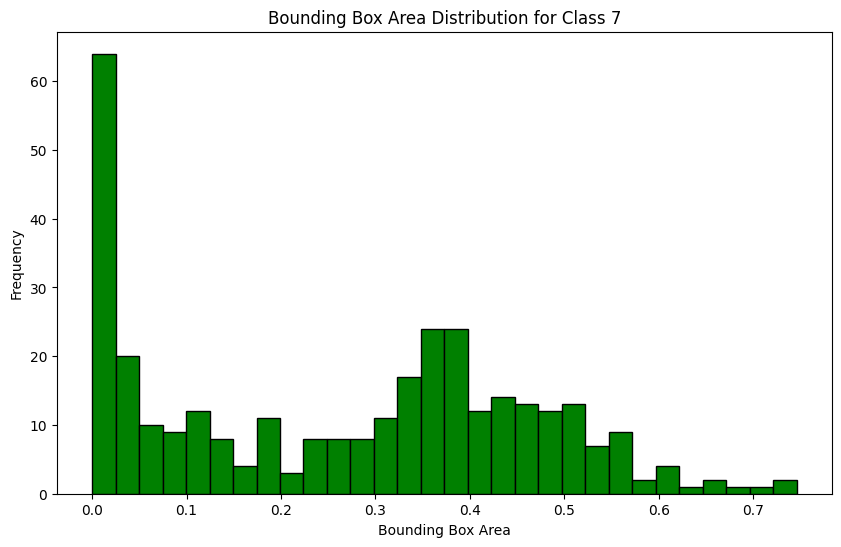

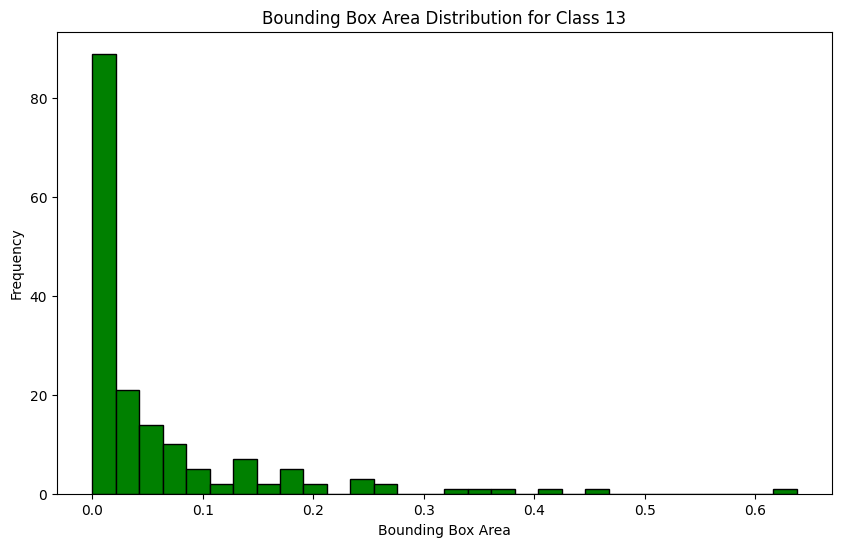

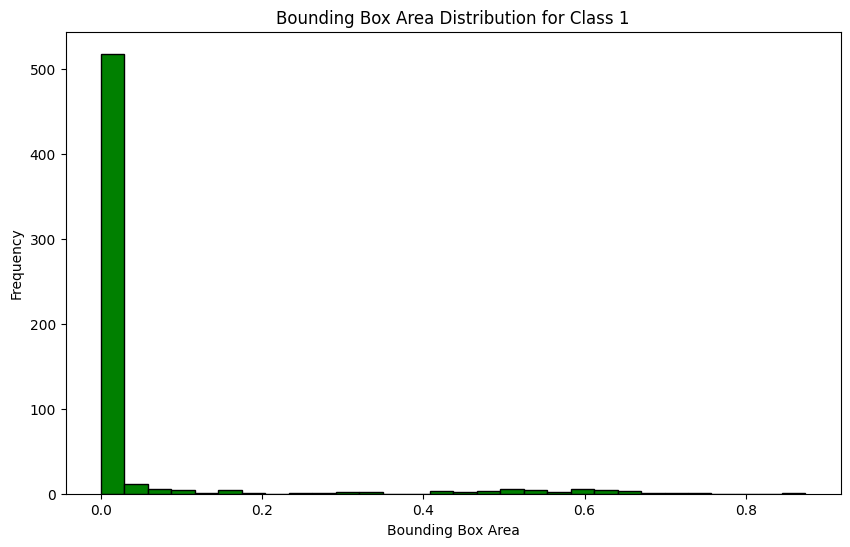

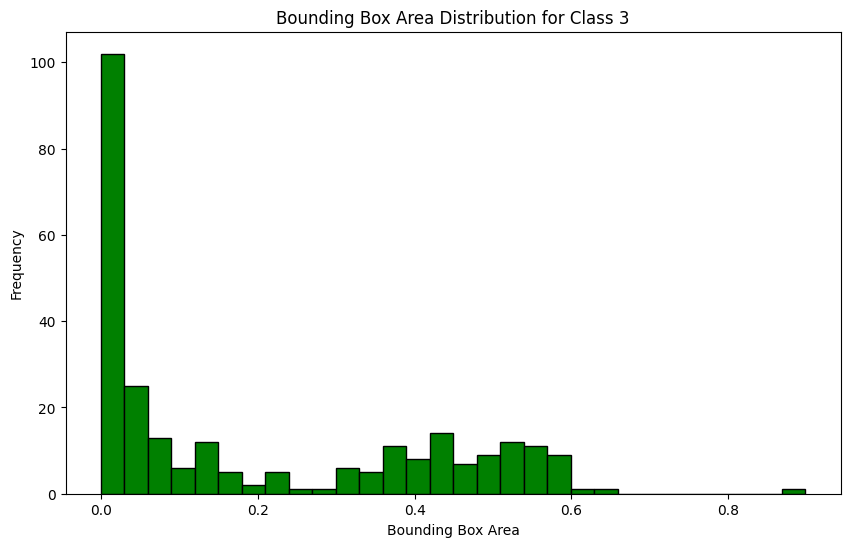

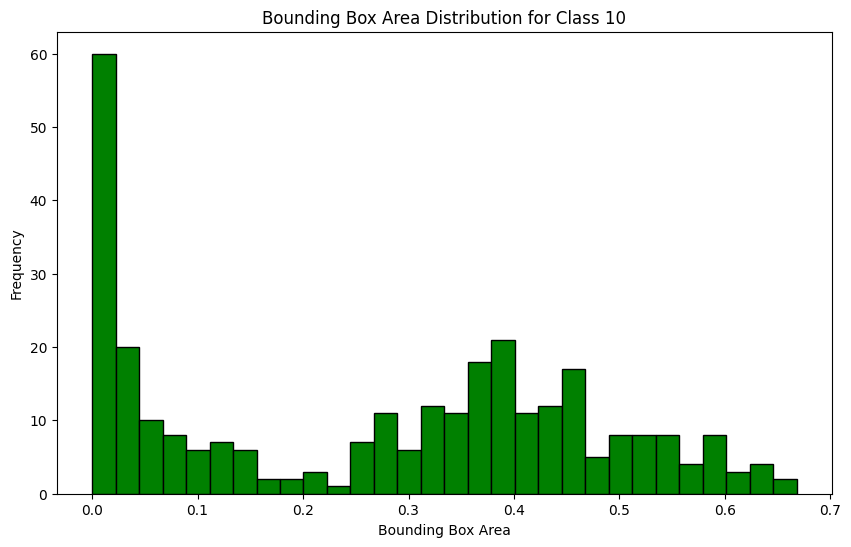

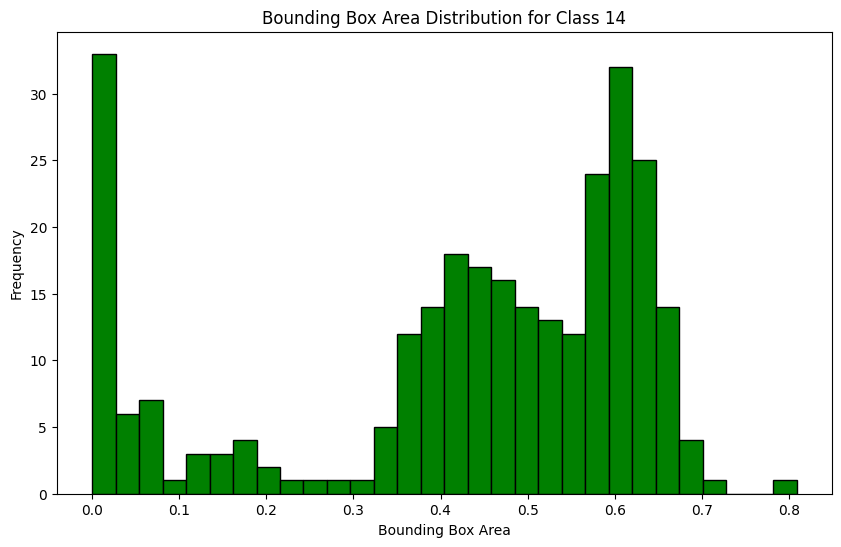

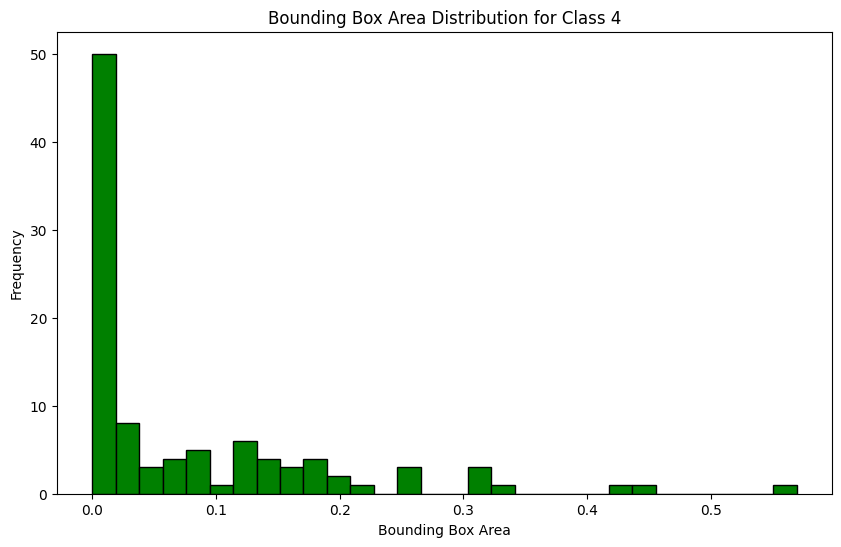

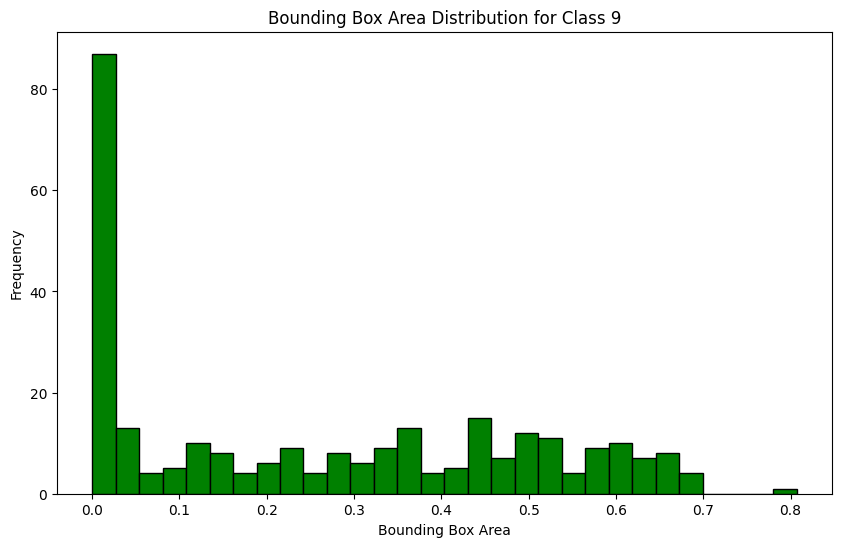

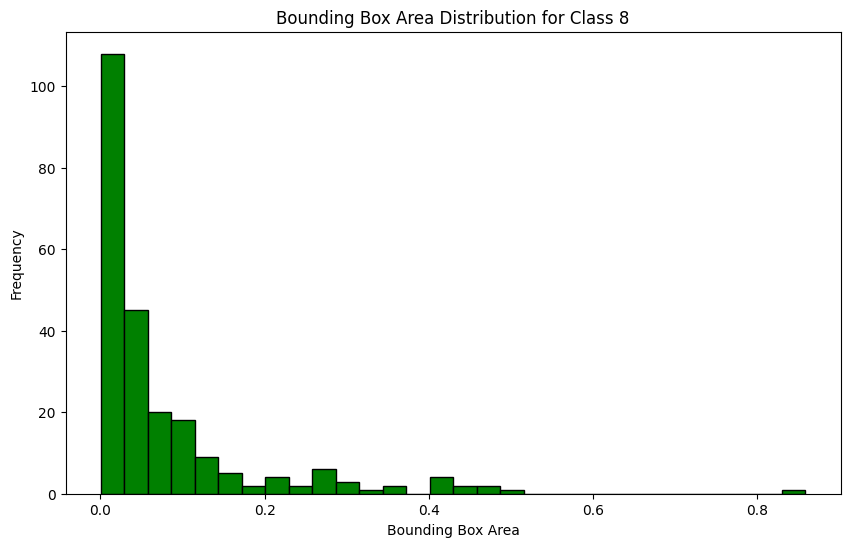

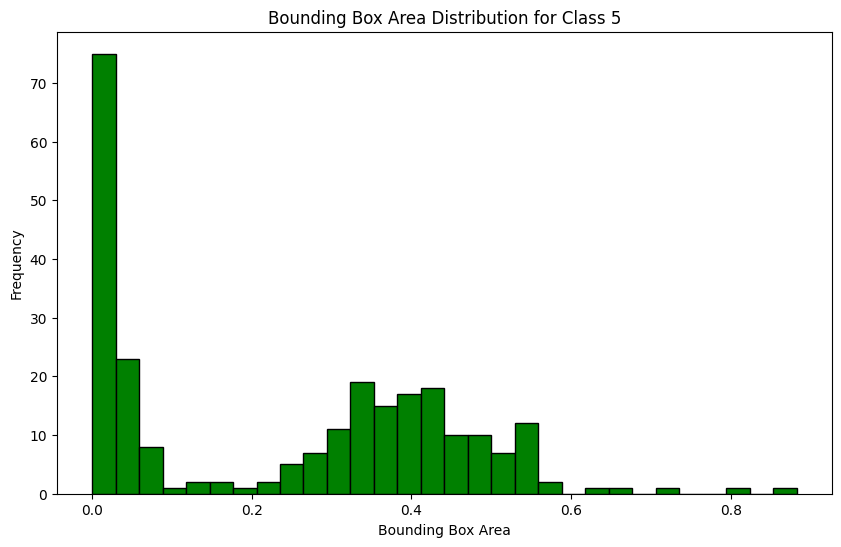

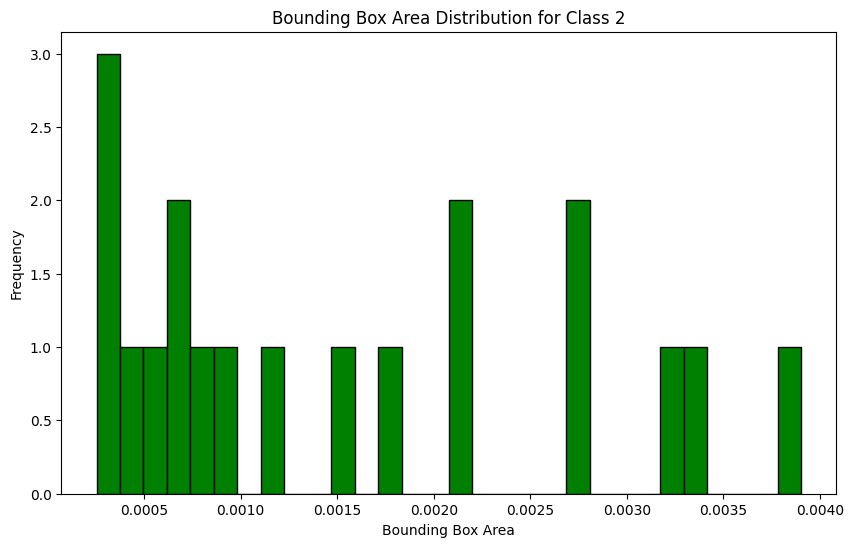


Bounding Box Aspect Ratio Distribution:


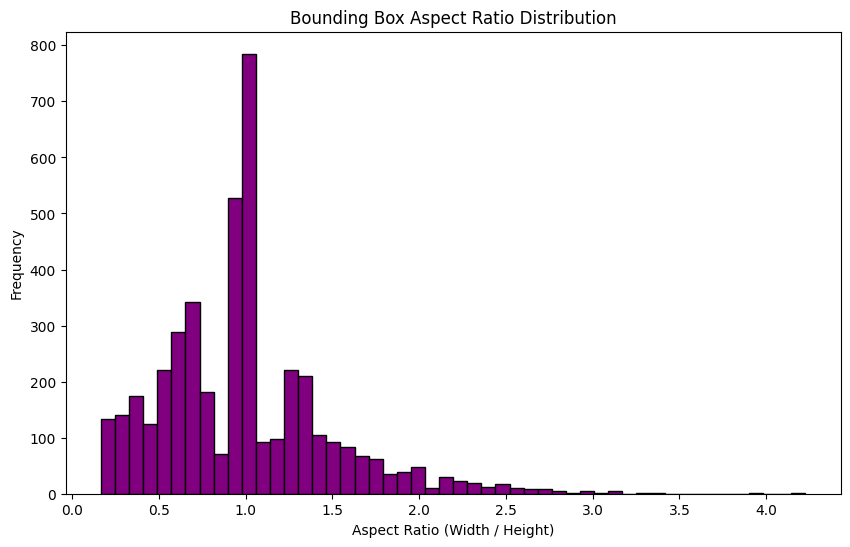


Bounding Box Overlap Distribution (IoU threshold=0.5):


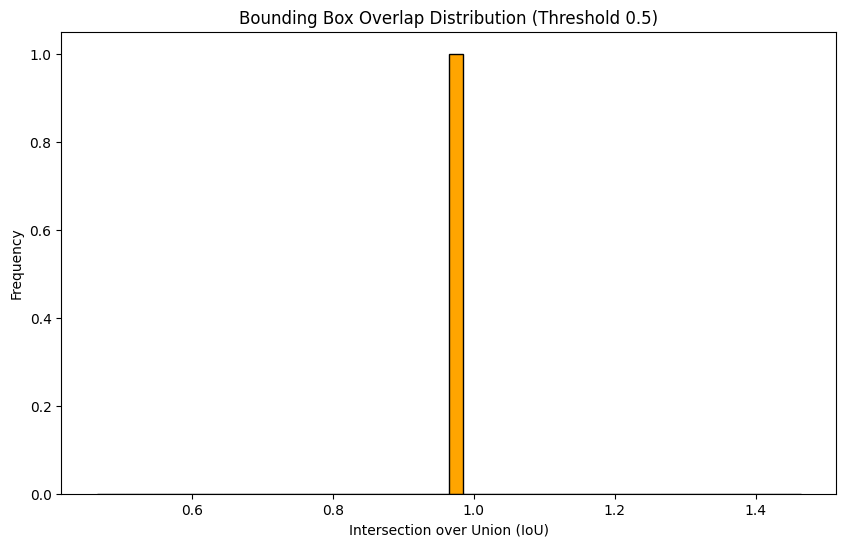

In [3]:
# Additional EDA Tasks

# 1. Bounding Box Area Distribution (Width * Height for each bounding box)
def bounding_box_area_distribution(labels_path):
    areas = []
    
    # Loop through each label file
    for label_file in os.listdir(labels_path):
        label_path = os.path.join(labels_path, label_file)
        labels = read_label_file(label_path)
        for label in labels:
            width = label['width']
            height = label['height']
            areas.append(width * height)  # Area is width * height
    
    plt.figure(figsize=(10, 6))
    plt.hist(areas, bins=50, color='skyblue', edgecolor='black')
    plt.title("Bounding Box Area Distribution")
    plt.xlabel("Bounding Box Area (Width * Height)")
    plt.ylabel("Frequency")
    plt.show()

# 2. Image-wise Bounding Box Count (How many bounding boxes per image)
def bounding_box_count_distribution(labels_path):
    box_counts = []
    
    # Loop through each label file
    for label_file in os.listdir(labels_path):
        label_path = os.path.join(labels_path, label_file)
        labels = read_label_file(label_path)
        box_counts.append(len(labels))  # Count number of boxes
    
    plt.figure(figsize=(10, 6))
    plt.hist(box_counts, bins=30, color='salmon', edgecolor='black')
    plt.title("Bounding Box Count Distribution per Image")
    plt.xlabel("Number of Bounding Boxes per Image")
    plt.ylabel("Frequency")
    plt.show()

# 3. Class-wise Bounding Box Area Distribution
def class_wise_bounding_box_area_distribution(labels_path):
    class_area = {}
    
    # Loop through each label file
    for label_file in os.listdir(labels_path):
        label_path = os.path.join(labels_path, label_file)
        labels = read_label_file(label_path)
        for label in labels:
            class_id = label['class_id']
            width = label['width']
            height = label['height']
            area = width * height
            if class_id not in class_area:
                class_area[class_id] = []
            class_area[class_id].append(area)
    
    # Plot for each class
    for class_id, areas in class_area.items():
        plt.figure(figsize=(10, 6))
        plt.hist(areas, bins=30, color='green', edgecolor='black')
        plt.title(f"Bounding Box Area Distribution for Class {class_id}")
        plt.xlabel("Bounding Box Area")
        plt.ylabel("Frequency")
        plt.show()

# 4. Aspect Ratio of Bounding Boxes (Width / Height)
def bounding_box_aspect_ratio(labels_path):
    aspect_ratios = []
    
    # Loop through each label file
    for label_file in os.listdir(labels_path):
        label_path = os.path.join(labels_path, label_file)
        labels = read_label_file(label_path)
        for label in labels:
            width = label['width']
            height = label['height']
            aspect_ratios.append(width / height)  # Aspect ratio is width / height
    
    plt.figure(figsize=(10, 6))
    plt.hist(aspect_ratios, bins=50, color='purple', edgecolor='black')
    plt.title("Bounding Box Aspect Ratio Distribution")
    plt.xlabel("Aspect Ratio (Width / Height)")
    plt.ylabel("Frequency")
    plt.show()

# 5. Overlapping Bounding Boxes (Bounding Box Overlap Ratio)
def bounding_box_overlap(labels_path, threshold=0.5):
    overlaps = []
    
    # Function to compute IOU (Intersection over Union)
    def compute_iou(box1, box2):
        x1, y1, w1, h1 = box1
        x2, y2, w2, h2 = box2
        
        x1_max, y1_max = x1 + w1, y1 + h1
        x2_max, y2_max = x2 + w2, y2 + h2
        
        # Calculate intersection
        x_intersection = max(0, min(x1_max, x2_max) - max(x1, x2))
        y_intersection = max(0, min(y1_max, y2_max) - max(y1, y2))
        intersection_area = x_intersection * y_intersection
        
        # Calculate union
        union_area = (w1 * h1) + (w2 * h2) - intersection_area
        iou = intersection_area / union_area if union_area > 0 else 0
        
        return iou
    
    # Loop through each label file
    for label_file in os.listdir(labels_path):
        label_path = os.path.join(labels_path, label_file)
        labels = read_label_file(label_path)
        for i in range(len(labels)):
            for j in range(i + 1, len(labels)):
                box1 = [labels[i]['x_center'], labels[i]['y_center'], labels[i]['width'], labels[i]['height']]
                box2 = [labels[j]['x_center'], labels[j]['y_center'], labels[j]['width'], labels[j]['height']]
                iou = compute_iou(box1, box2)
                if iou > threshold:
                    overlaps.append(iou)
    
    # Plot overlap ratio
    plt.figure(figsize=(10, 6))
    plt.hist(overlaps, bins=50, color='orange', edgecolor='black')
    plt.title(f"Bounding Box Overlap Distribution (Threshold {threshold})")
    plt.xlabel("Intersection over Union (IoU)")
    plt.ylabel("Frequency")
    plt.show()

# Running the Additional EDA Tasks
print("\nBounding Box Area Distribution:")
bounding_box_area_distribution(train_labels_path)

print("\nBounding Box Count Distribution per Image:")
bounding_box_count_distribution(train_labels_path)

print("\nClass-wise Bounding Box Area Distribution:")
class_wise_bounding_box_area_distribution(train_labels_path)

print("\nBounding Box Aspect Ratio Distribution:")
bounding_box_aspect_ratio(train_labels_path)

print("\nBounding Box Overlap Distribution (IoU threshold=0.5):")
bounding_box_overlap(train_labels_path, threshold=0.5)
